\# **Project**

## **Dataset**


The datasets contain credit card transactions made in September 2013 by European cardholders. This dataset presents the transactions that occurred in two days, where we have 492 frauds in 284,807 transactions.
https://www.kaggle.com/mlg-ulb/creditcardfraud

## **Imports and Initial Data Analysis**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report

from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
from collections import Counter

from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import permutation_importance
import lightgbm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from imblearn.metrics import specificity_score

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#!pip install shap
#!pip install catboost
#import shap
#from catboost import Pool, CatBoostClassifier
#from pandas_profiling import ProfileReport

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df= pd.read_csv('/content/drive/My Drive/creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
feature_list = list(df.drop('Class', axis=1).columns)

In [ ]:
# Resumo Estatistico do Dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df[(df['Class']==1)].describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,4.897341,2.678605,4.654458,1.104518,4.278940,1.049915,3.865035,6.970618,2.899366,1.539853,1.346635,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,-24.588262,-1.702228,-18.683715,-3.127795,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-3.681904,-4.128186,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,-7.756698,1.973397,-8.688177,-0.979117,-9.692723,-0.643539,-6.562915,-11.945057,-4.664576,-0.299423,-0.171760,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,-4.578825,3.586218,-5.502530,-0.065566,-6.729720,-0.057227,-3.549795,-5.302949,-1.664346,0.646807,0.284693,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,-2.614184,5.307078,-2.974088,0.672964,-4.282821,0.609189,-1.226043,-1.341940,0.091772,1.649318,0.822445,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,4.031435,12.018913,1.375941,2.815440,3.442422,2.471358,3.139656,6.739384,3.790316,5.228342,11.059004,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


In [ ]:
df[(df['Class']==0)].describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0
mean,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,0.0
std,47484.015786,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,1.044204,1.003112,0.945939,0.995067,0.897007,0.915060,0.844772,0.749457,0.824919,0.811733,0.769404,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,250.105092,0.0
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,-14.741096,-4.797473,-15.144988,-5.791881,-18.392091,-4.391307,-10.115560,-17.098444,-5.366660,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,54230.000000,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,-0.640412,-0.532880,-0.763447,-0.402102,-0.648067,-0.422453,-0.582812,-0.465543,-0.482644,-0.497414,-0.456366,-0.211764,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,5.650000,0.0
50%,84711.000000,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,-0.091872,-0.034923,0.141679,-0.013547,0.051947,0.048294,0.067377,-0.064833,-0.002787,0.003117,-0.062646,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.000000,0.0
75%,139333.000000,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,0.455135,0.736362,0.619207,0.662492,0.494104,0.648842,0.523738,0.399922,0.501103,0.457499,0.132401,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,77.050000,0.0
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,23.745136,10.002190,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df[(df['Class']==1)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 541 to 281674
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    492 non-null    float64
 1   V1      492 non-null    float64
 2   V2      492 non-null    float64
 3   V3      492 non-null    float64
 4   V4      492 non-null    float64
 5   V5      492 non-null    float64
 6   V6      492 non-null    float64
 7   V7      492 non-null    float64
 8   V8      492 non-null    float64
 9   V9      492 non-null    float64
 10  V10     492 non-null    float64
 11  V11     492 non-null    float64
 12  V12     492 non-null    float64
 13  V13     492 non-null    float64
 14  V14     492 non-null    float64
 15  V15     492 non-null    float64
 16  V16     492 non-null    float64
 17  V17     492 non-null    float64
 18  V18     492 non-null    float64
 19  V19     492 non-null    float64
 20  V20     492 non-null    float64
 21  V21     492 non-null    float64
 2

In [ ]:
df[(df['Class']==0)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284315 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284315 non-null  float64
 1   V1      284315 non-null  float64
 2   V2      284315 non-null  float64
 3   V3      284315 non-null  float64
 4   V4      284315 non-null  float64
 5   V5      284315 non-null  float64
 6   V6      284315 non-null  float64
 7   V7      284315 non-null  float64
 8   V8      284315 non-null  float64
 9   V9      284315 non-null  float64
 10  V10     284315 non-null  float64
 11  V11     284315 non-null  float64
 12  V12     284315 non-null  float64
 13  V13     284315 non-null  float64
 14  V14     284315 non-null  float64
 15  V15     284315 non-null  float64
 16  V16     284315 non-null  float64
 17  V17     284315 non-null  float64
 18  V18     284315 non-null  float64
 19  V19     284315 non-null  float64
 20  V20     284315 non-null  float64
 21  V21     28

In [ ]:
#!pip install pandas-profiling
#!pip install --upgrade pandas-profiling

In [ ]:
#EDA usando pandas-profiling
#profile = ProfileReport(df, explorative=True)

#salvando o resultado
#profile.to_file("output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:4812: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
print('\nPorcentagem de Fraudes: {:.2%}'.format((df[df['Class'] == 1].shape[0] / df.shape[0])))


Porcentagem de Fraudes: 0.17%


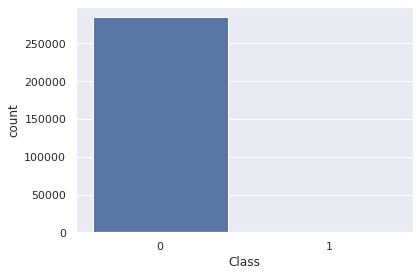

In [ ]:

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.countplot(x='Class', data=df)
plt.tight_layout()

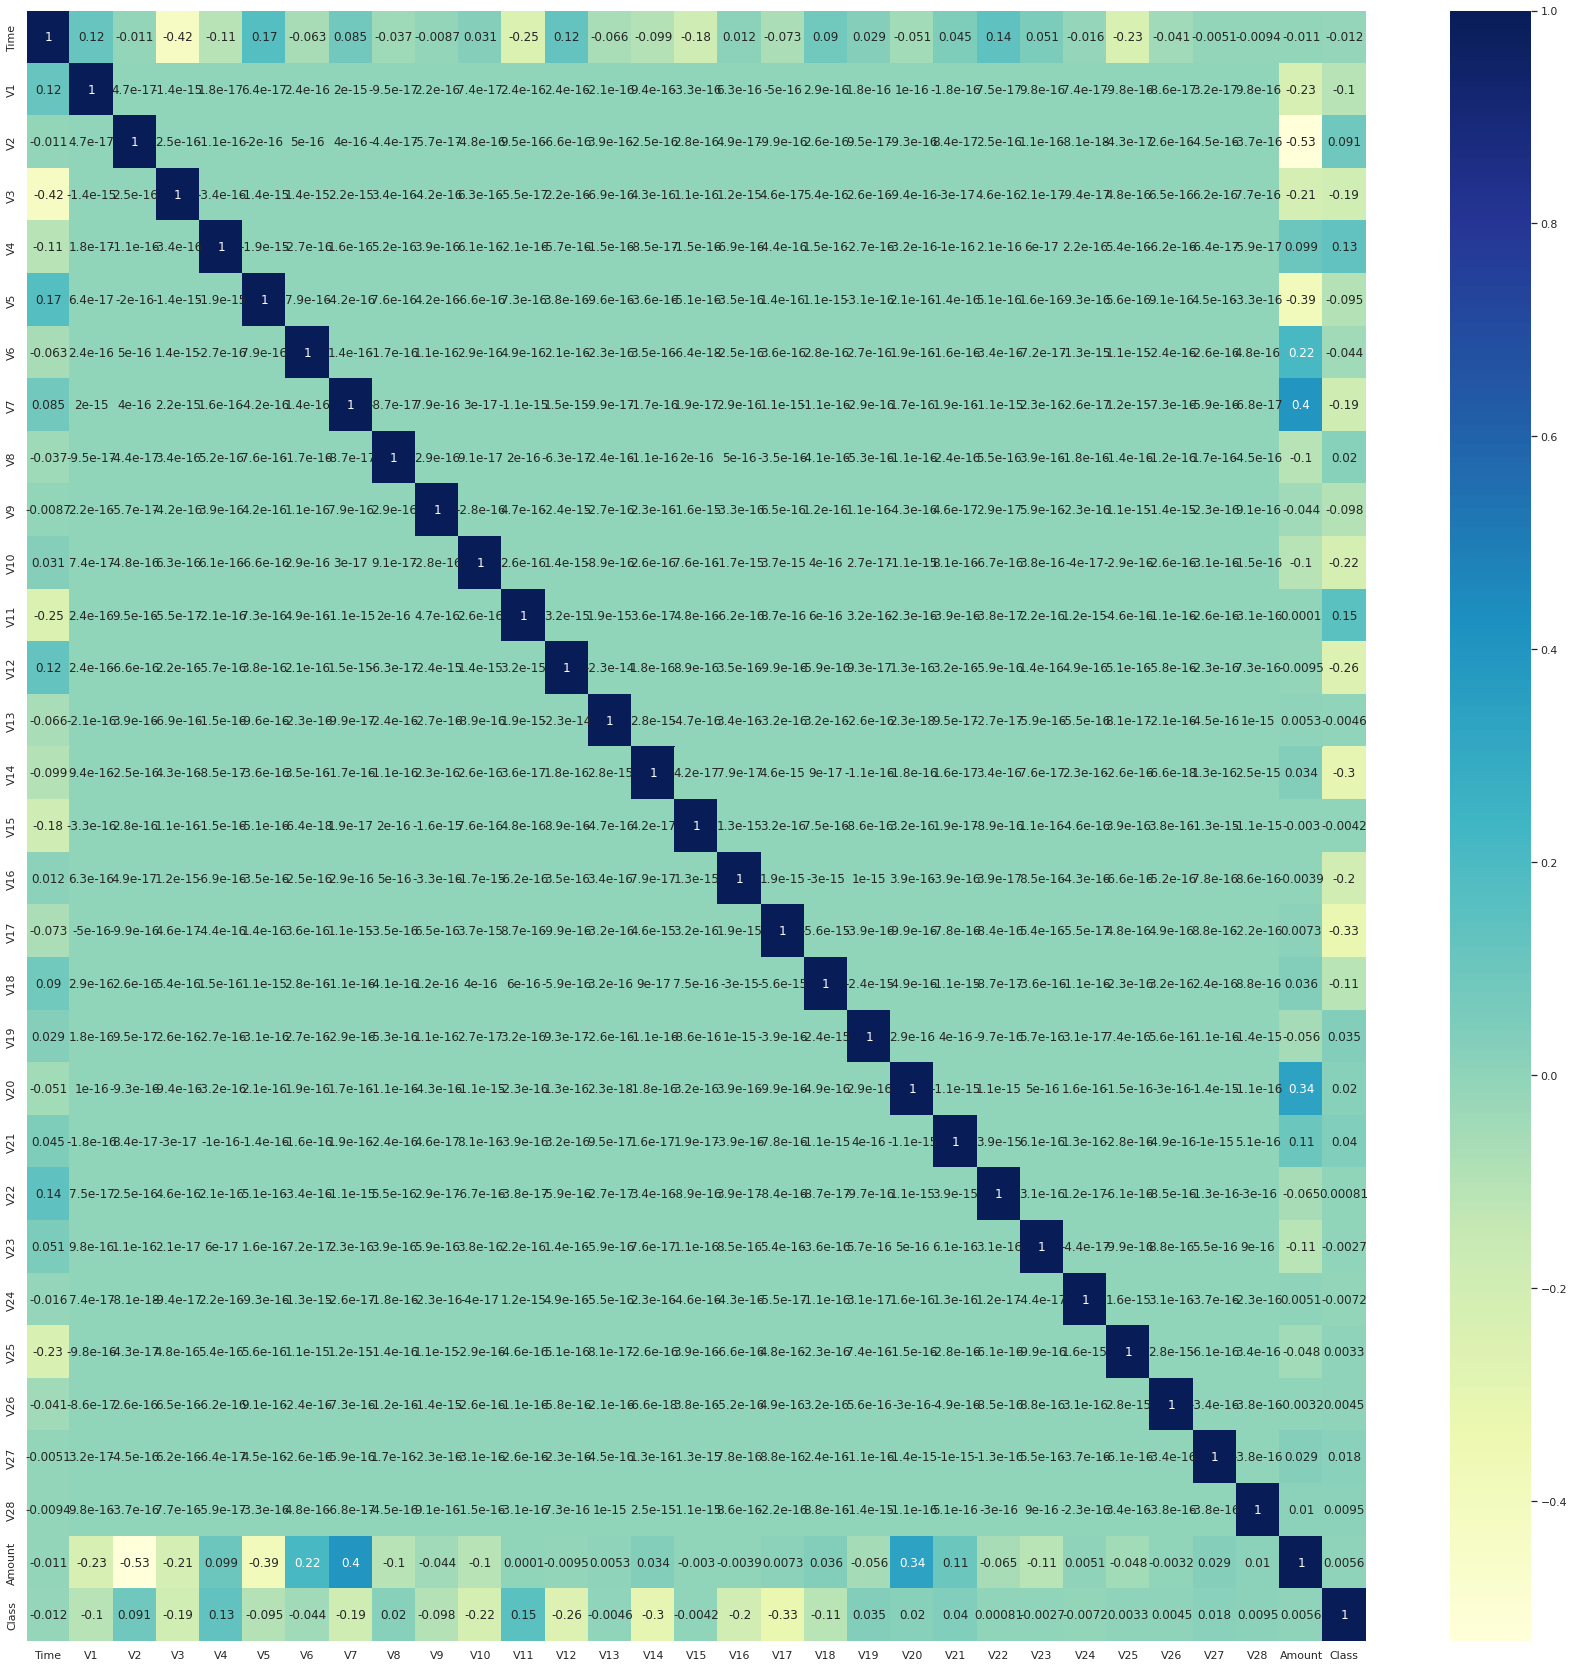

In [ ]:
plt.figure(figsize=(30,30))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

## **Pre Processing**



* Normalize data
* Balancing Classes
* Split training and test data
* Apply oversampling technique
* Feature Importance









In [ ]:
def normalizar(df):
    #Aplica a Normalização Z-score 
    data = df.copy()
    scaler = StandardScaler()
    data['std_amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
    data['std_time'] = scaler.fit_transform(data['Time'].values.reshape(-1, 1))
    data.drop(['Amount', 'Time'], axis=1, inplace=True)
    return data

In [ ]:
df_norm = normalizar(df)

In [ ]:
df_norm.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


In [ ]:
def dividirDataset(data):
  # Dividir o Dataset em Dados e Labels. Oversampling com SMOTE e train test split.
    X = data.drop('Class', axis=1)
    y = data['Class']
    oversample = SMOTE(random_state=42)
    X, y = oversample.fit_resample(X, y)
    return train_test_split(X, y, test_size=0.25, random_state=42)


In [ ]:
X_train_Norm, X_test_Norm, y_train_Norm, y_test_Norm = dividirDataset(df_norm)

In [ ]:
X_train, X_test, y_train, y_test = dividirDataset(df)

In [ ]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [ ]:
Counter(y_train)

Counter({0: 213123, 1: 213349})

In [ ]:
Counter(y_test)

Counter({0: 71192, 1: 70966})

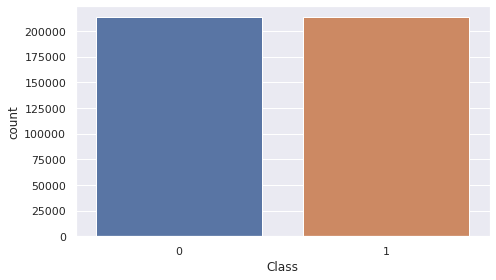

In [ ]:
fig, ax = plt.subplots(figsize=(7, 4))
ax = sns.countplot(y_train)
plt.tight_layout()

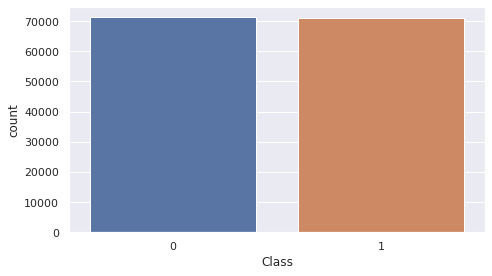

In [ ]:
fig, ax = plt.subplots(figsize=(7, 4))
ax = sns.countplot(y_test)
plt.tight_layout()

## **Feature Importance**


Analysis of which features have the most impact on fraud resolution.

### **Catboost Feature Importance**

**Preparação dos dados para o Catboost**

In [ ]:
df['Time']=df['Time'].apply(lambda x:int(x))
df['Amount']=df['Amount'].apply(lambda x:round(x))
for i in range(28):
  df['V'+str(i+1)]=df['V'+str(i+1)].apply(lambda x:int(x*1000000))



In [ ]:
categorical_features = np.array(feature_list).astype("object")

In [ ]:
#for i in range(len(feature_list)):
#  feature_list[i]= feature_list[i].apply(lambda x:str(x))

In [ ]:
categorical_features

array(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Amount'], dtype=object)

In [ ]:
train_pool = Pool(X_train, y_train, categorical_features)
test_pool = Pool(X_test, y_test, categorical_features)

model = CatBoostClassifier(iterations=500, max_depth=5, learning_rate=0.1, random_seed=1066, logging_level='Silent')
model.fit(X_train, y_train, eval_set=test_pool, cat_features=categorical_features, use_best_model=True, early_stopping_rounds=10)

rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
rmse

0.4509993811104214

Text(0.5, 1.0, 'Feature Importance')

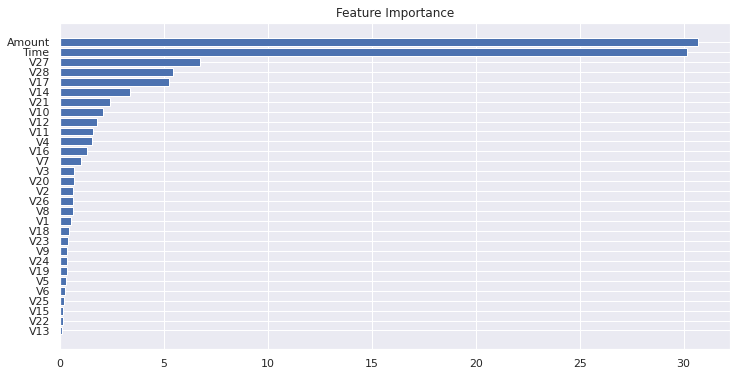

In [ ]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

Text(0.5, 1.0, 'Permutation Importance')

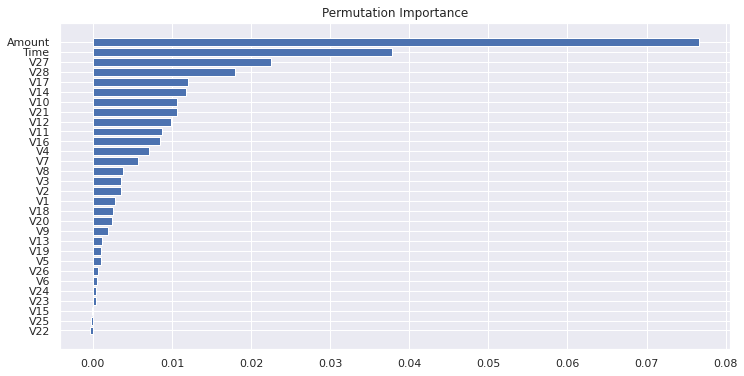

In [ ]:
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=1066)
sorted_idx = perm_importance.importances_mean.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Permutation Importance')

In [ ]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test)
shap_importance = shap_values.abs.mean(0).values
sorted_idx = shap_importance.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), shap_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('SHAP Importance')

In [ ]:
shap.plots.bar(shap_values, max_display=X_test.shape[0])

In [ ]:
result={}
predictions = model.predict(X_test)
acc = metrics.accuracy_score(y_test, predictions) 
bacc = metrics.balanced_accuracy_score(y_test, predictions)
prec = metrics.precision_score(y_test, predictions)
rec = metrics.recall_score(y_test, predictions)
f1 = metrics.f1_score(y_test, predictions) 
auc = metrics.roc_auc_score(y_test, predictions)
result.append({ 'name': item['name'], 'accuracy': acc , 'b-accuracy':bacc, 'precision':prec,'recall':rec, 'F-1':f1, 'AUC':auc })

In [ ]:
pd.DataFrame(result)

,name,accuracy,b-accuracy,precision,recall,F-1,AUC
0,Catboost,0.7966,0.796649,0.839149,0.734266,0.783212,0.796649


In [ ]:
result

[{'AUC': 0.796648706945299,
  'F-1': 0.7832117499756334,
  'accuracy': 0.7965995582380169,
  'b-accuracy': 0.796648706945299,
  'name': 'Catboost',
  'precision': 0.8391491549386286,
  'recall': 0.7342658325718704}]

### **GradientBoosting Feature Importance**

**negrito**

In [ ]:
model = GradientBoostingClassifier(learning_rate=0.05, max_depth=5, n_estimators=500, min_samples_split=5, n_iter_no_change=10)
model.fit(X_train, y_train)

rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test_loo)))
rmse

0.032047250530248116

Text(0.5, 1.0, 'Feature Importance')

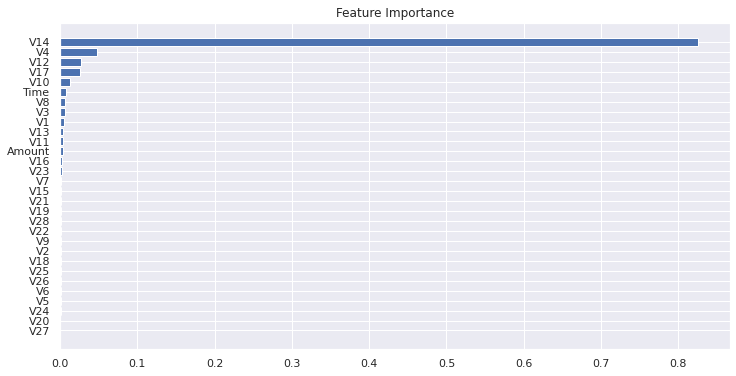

In [ ]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

Text(0.5, 1.0, 'Permutation Importance')

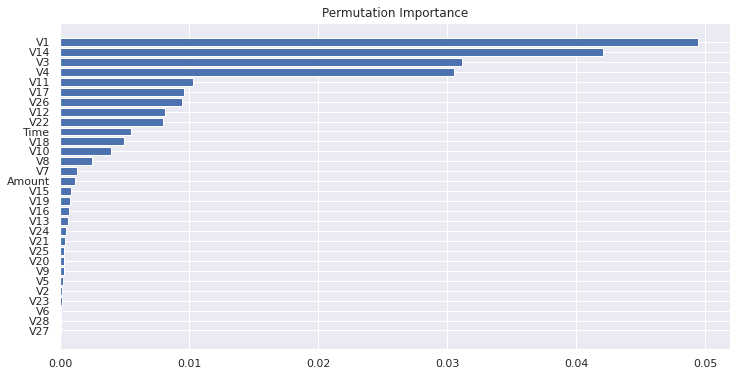

In [ ]:
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=1066)
sorted_idx = perm_importance.importances_mean.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Permutation Importance')

Text(0.5, 1.0, 'SHAP Importance')

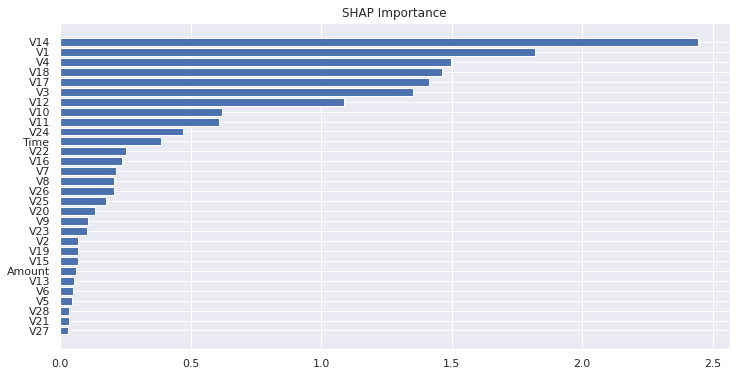

In [ ]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test)
shap_importance = shap_values.abs.mean(0).values
sorted_idx = shap_importance.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), shap_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('SHAP Importance')

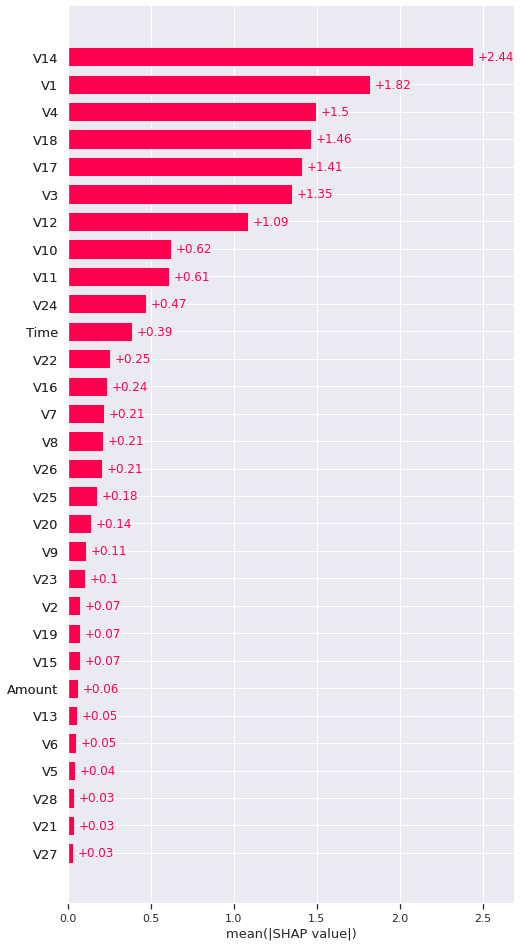

In [ ]:
shap.plots.bar(shap_values, max_display=X_test.shape[0])

In [ ]:
result1=[]
predictions = model.predict(X_test)
acc = metrics.accuracy_score(y_test, predictions) 
bacc = metrics.balanced_accuracy_score(y_test, predictions)
prec = metrics.precision_score(y_test, predictions)
rec = metrics.recall_score(y_test, predictions)
f1 = metrics.f1_score(y_test, predictions) 
auc = metrics.roc_auc_score(y_test, predictions)
result1.append({ 'name': "Gradient Boosting", 'accuracy': acc , 'b-accuracy':bacc, 'precision':prec,'recall':rec, 'F-1':f1, 'AUC':auc })

In [ ]:
pd.DataFrame(result1)

,name,accuracy,b-accuracy,precision,recall,F-1,AUC
0,Gradient Boosting,0.998973,0.998973,0.998609,0.999339,0.998974,0.998973


In [ ]:
result1

[{'AUC': 0.9989726849058795,
  'F-1': 0.9989741571928443,
  'accuracy': 0.9989729737334515,
  'b-accuracy': 0.9989726849058796,
  'name': 'Gradient Boosting',
  'precision': 0.9986092966412407,
  'recall': 0.999339284459127}]

### **XGBoost Feature Importance**

In [ ]:
model = xgb.XGBClassifier(n_estimators=500, max_depth=5, eta=0.05,random_state=42)
model.fit(X_train, y_train)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, model.predict(np.ascontiguousarray(X_test))))
rmse

Text(0.5, 1.0, 'Feature Importance')

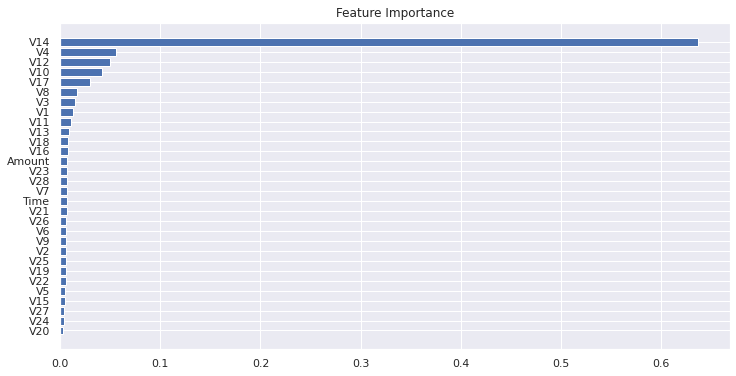

In [ ]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

Text(0.5, 1.0, 'Permutation Importance')

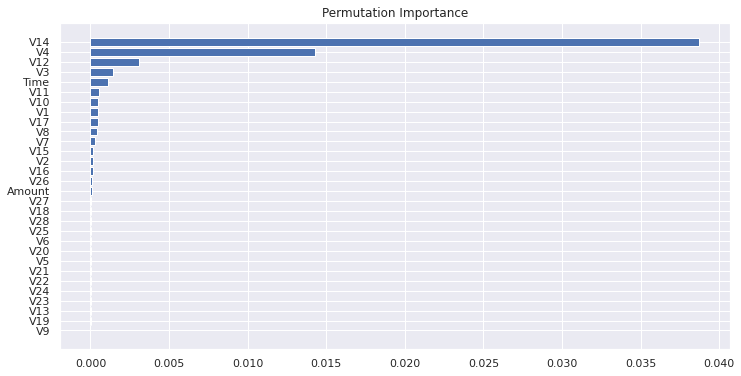

In [ ]:
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=1066)
sorted_idx = perm_importance.importances_mean.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Permutation Importance')

Text(0.5, 1.0, 'SHAP Importance')

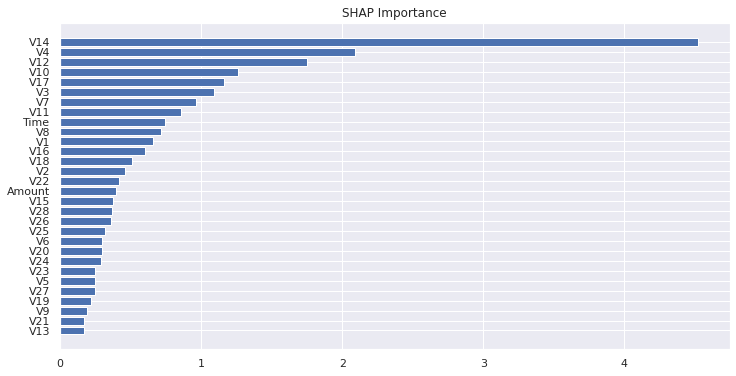

In [ ]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test)
shap_importance = shap_values.abs.mean(0).values
sorted_idx = shap_importance.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), shap_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('SHAP Importance')

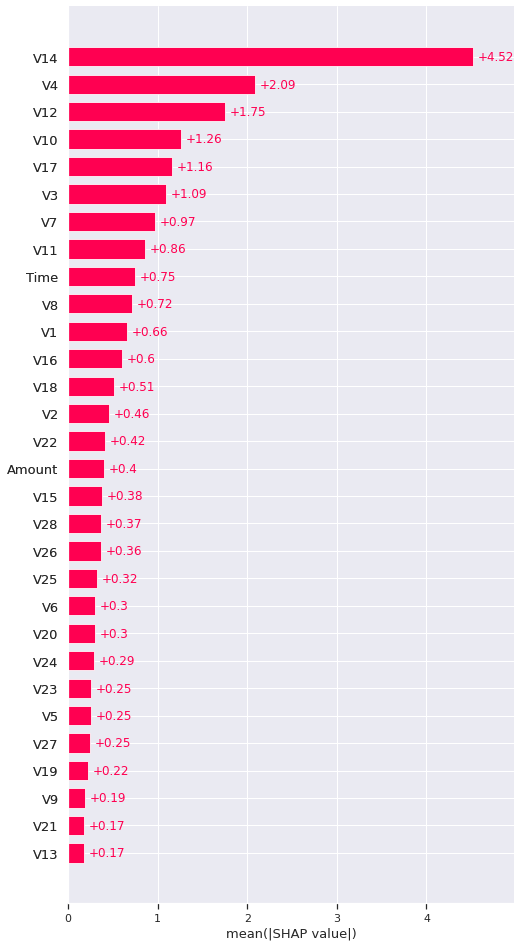

In [ ]:
shap.plots.bar(shap_values, max_display=X_test.shape[0])

In [ ]:
result2=[]
predictions = model.predict(X_test)
acc = metrics.accuracy_score(y_test, predictions) 
bacc = metrics.balanced_accuracy_score(y_test, predictions)
prec = metrics.precision_score(y_test, predictions)
rec = metrics.recall_score(y_test, predictions)
f1 = metrics.f1_score(y_test, predictions) 
auc = metrics.roc_auc_score(y_test, predictions)
result2.append({ 'name': "XGBoosting", 'accuracy': acc , 'b-accuracy':bacc, 'precision':prec,'recall':rec, 'F-1':f1, 'AUC':auc })

In [ ]:
pd.DataFrame(result2)

,name,accuracy,b-accuracy,precision,recall,F-1,AUC
0,XGBoosting,0.999866,0.999866,0.999733,1.0,0.999866,0.999866


In [ ]:
result2

[{'AUC': 0.9998662405136365,
  'F-1': 0.9998664689470023,
  'accuracy': 0.999866345896819,
  'b-accuracy': 0.9998662405136365,
  'name': 'XGBoosting',
  'precision': 0.9997329735503274,
  'recall': 1.0}]

### **AdaBoost Feature Importance**

In [ ]:
model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


AdaBoostClassifier(n_estimators=100, random_state=42)

Text(0.5, 1.0, 'Feature Importance')

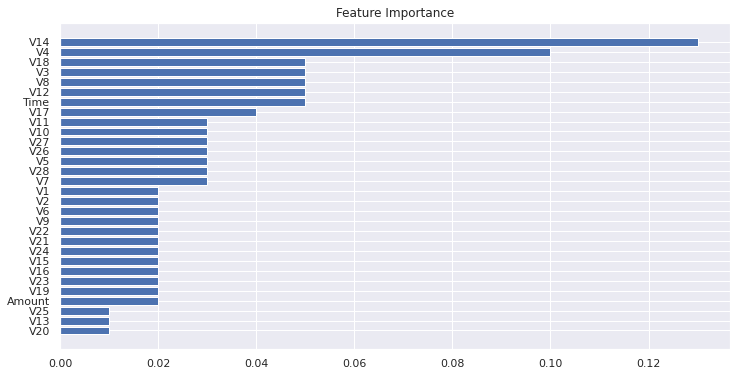

In [ ]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

Text(0.5, 1.0, 'Permutation Importance')

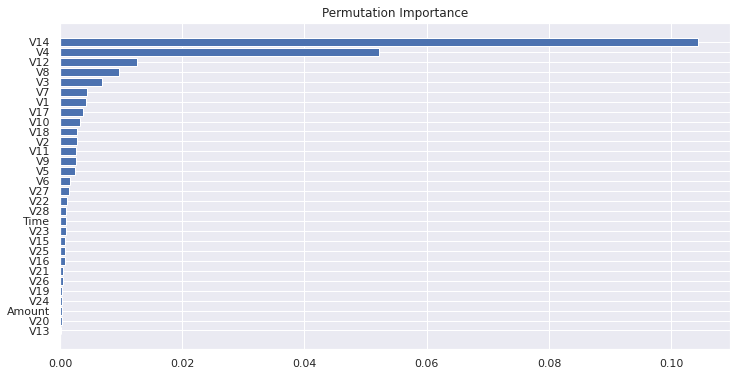

In [ ]:
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=1066)
sorted_idx = perm_importance.importances_mean.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Permutation Importance')

In [ ]:
result=[]
predictions = model.predict(X_test)
acc = metrics.accuracy_score(y_test, predictions) 
bacc = metrics.balanced_accuracy_score(y_test, predictions)
prec = metrics.precision_score(y_test, predictions)
rec = metrics.recall_score(y_test, predictions)
f1 = metrics.f1_score(y_test, predictions) 
auc = metrics.roc_auc_score(y_test, predictions)
result.append({ 'name': "AdaBoosting", 'accuracy': acc , 'b-accuracy':bacc, 'precision':prec,'recall':rec, 'F-1':f1, 'AUC':auc })

In [ ]:
pd.DataFrame(result)

,name,accuracy,b-accuracy,precision,recall,F-1,AUC
0,AdaBoosting,0.986494,0.986498,0.991521,0.981402,0.986435,0.986498


In [ ]:
result

[{'AUC': 0.9864979163456465,
  'F-1': 0.9864353134007801,
  'accuracy': 0.986493901152239,
  'b-accuracy': 0.9864979163456465,
  'name': 'AdaBoosting',
  'precision': 0.9915209703304976,
  'recall': 0.9814015604132986}]

### **DecisionTree Feature Importance**

In [ ]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

rmse = np.sqrt(mean_squared_error(y_test, model.predict(np.ascontiguousarray(X_test))))
rmse

0.04193574395193444

Text(0.5, 1.0, 'Feature Importance')

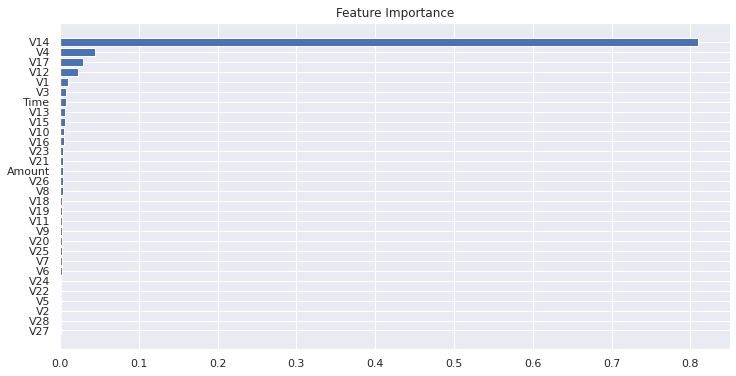

In [ ]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

Text(0.5, 1.0, 'Permutation Importance')

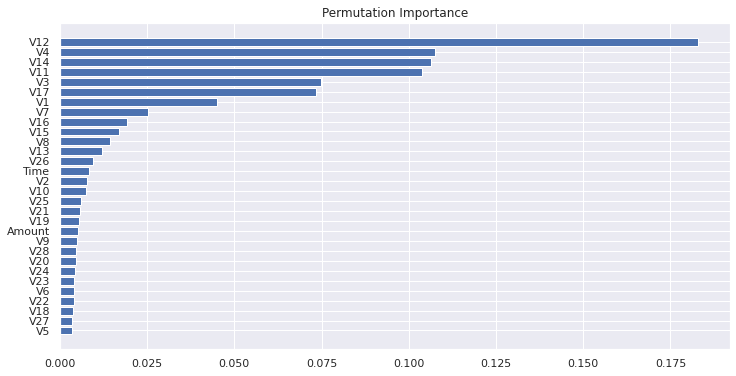

In [ ]:
perm_importance = permutation_importance(model, np.ascontiguousarray(X_test), y_test, n_repeats=10, random_state=1066)
sorted_idx = perm_importance.importances_mean.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Permutation Importance')

In [ ]:
result=[]
predictions = model.predict(X_test)
acc = metrics.accuracy_score(y_test, predictions) 
bacc = metrics.balanced_accuracy_score(y_test, predictions)
prec = metrics.precision_score(y_test, predictions)
rec = metrics.recall_score(y_test, predictions)
f1 = metrics.f1_score(y_test, predictions) 
auc = metrics.roc_auc_score(y_test, predictions)
result.append({ 'name': "Decision Tree", 'accuracy': acc , 'b-accuracy':bacc, 'precision':prec,'recall':rec, 'F-1':f1, 'AUC':auc })

In [ ]:
pd.DataFrame(result)

,name,accuracy,b-accuracy,precision,recall,F-1,AUC
0,Decision Tree,0.998241,0.998241,0.997264,0.999227,0.998245,0.998241


In [ ]:
result

[{'AUC': 0.9982406163912337,
  'F-1': 0.998244505301594,
  'accuracy': 0.9982413933791978,
  'b-accuracy': 0.9982406163912337,
  'name': 'Decision Tree',
  'precision': 0.9972641178533848,
  'recall': 0.999226822239404}]

### **LGBM Feature Importance**

In [ ]:
model = lightgbm.LGBMClassifier(random_state=42)
model.fit(X_train, y_train)

rmse = np.sqrt(mean_squared_error(y_test, model.predict(np.ascontiguousarray(X_test))))
rmse

0.02054423493324902

Text(0.5, 1.0, 'Feature Importance')

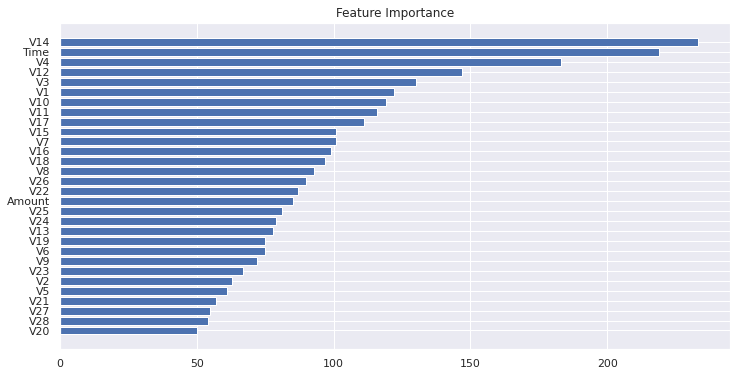

In [ ]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

Text(0.5, 1.0, 'Permutation Importance')

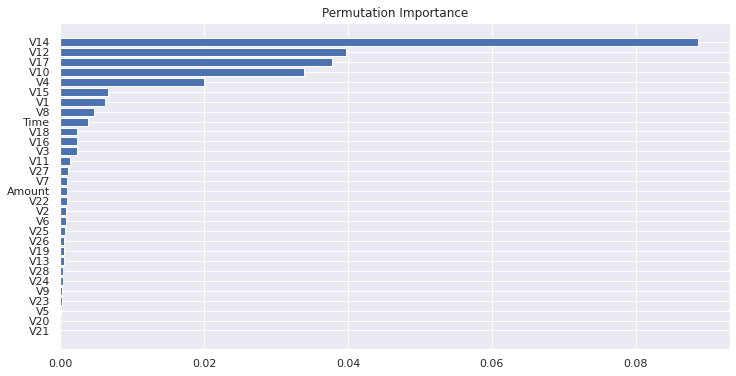

In [ ]:
perm_importance = permutation_importance(model, np.ascontiguousarray(X_test), y_test, n_repeats=10, random_state=1066)
sorted_idx = perm_importance.importances_mean.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Permutation Importance')

In [ ]:
result=[]
predictions = model.predict(X_test)
acc = metrics.accuracy_score(y_test, predictions) 
bacc = metrics.balanced_accuracy_score(y_test, predictions)
prec = metrics.precision_score(y_test, predictions)
rec = metrics.recall_score(y_test, predictions)
f1 = metrics.f1_score(y_test, predictions) 
auc = metrics.roc_auc_score(y_test, predictions)
result.append({ 'name': "LGBM", 'accuracy': acc , 'b-accuracy':bacc, 'precision':prec,'recall':rec, 'F-1':f1, 'AUC':auc })

In [ ]:
pd.DataFrame(result)

,name,accuracy,b-accuracy,precision,recall,F-1,AUC
0,LGBM,0.999578,0.999578,0.999241,0.999916,0.999578,0.999578


In [ ]:
result

[{'AUC': 0.9995776681274127,
  'F-1': 0.9995784089152462,
  'accuracy': 0.9995779344110075,
  'b-accuracy': 0.9995776681274127,
  'name': 'LGBM',
  'precision': 0.9992413919053706,
  'recall': 0.9999156533352077}]

### **RandomForest Feature Importance**

In [ ]:
model = RandomForestClassifier(max_depth=6, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, random_state=42)

Text(0.5, 1.0, 'Feature Importance')

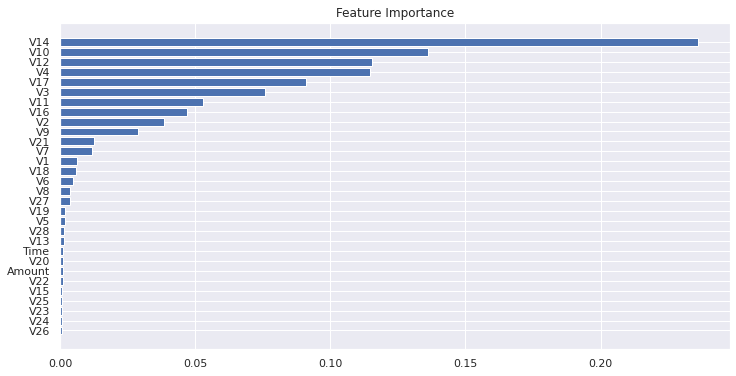

In [ ]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

Text(0.5, 1.0, 'Permutation Importance')

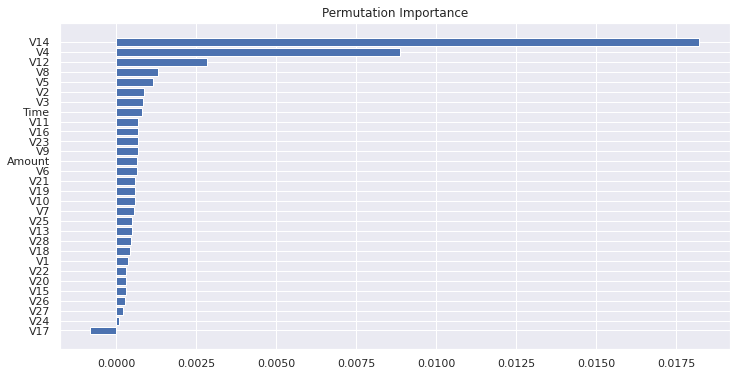

In [ ]:
perm_importance = permutation_importance(model, np.ascontiguousarray(X_test), y_test, n_repeats=10, random_state=1066)
sorted_idx = perm_importance.importances_mean.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Permutation Importance')

In [ ]:
result=[]
predictions = model.predict(X_test)
acc = metrics.accuracy_score(y_test, predictions) 
bacc = metrics.balanced_accuracy_score(y_test, predictions)
prec = metrics.precision_score(y_test, predictions)
rec = metrics.recall_score(y_test, predictions)
f1 = metrics.f1_score(y_test, predictions) 
auc = metrics.roc_auc_score(y_test, predictions)
result.append({ 'name': "Random Forest", 'accuracy': acc , 'b-accuracy':bacc, 'precision':prec,'recall':rec, 'F-1':f1, 'AUC':auc })

In [ ]:
pd.DataFrame(result)

,name,accuracy,b-accuracy,precision,recall,F-1,AUC
0,Random Forest,0.974493,0.974509,0.99497,0.953848,0.973975,0.974509


In [ ]:
result

[{'AUC': 0.9745094475630635,
  'F-1': 0.9739754539582287,
  'accuracy': 0.9744931695718848,
  'b-accuracy': 0.9745094475630635,
  'name': 'Random Forest',
  'precision': 0.9949703057408901,
  'recall': 0.9538483165811485}]

## **Distribution of Variables**

### **Time**

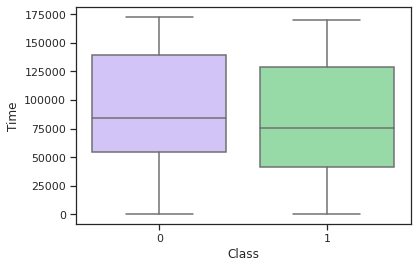

In [ ]:
sns.set_theme(style="ticks", palette="pastel")


# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Class", y="Time", palette=["m", "g"],data=df)

### **Amount**

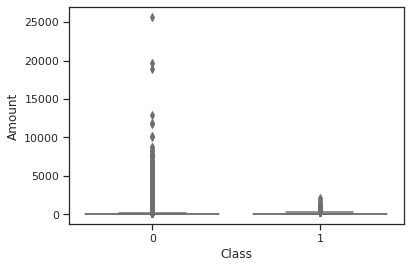

In [ ]:
sns.set_theme(style="ticks", palette="pastel")


# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Class", y="Amount", palette=["m", "g"],data=df)

### **V1**

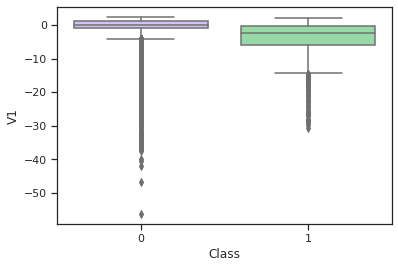

In [ ]:
sns.set_theme(style="ticks", palette="pastel")


# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Class", y="V1", palette=["m", "g"],data=df)

### **V2**

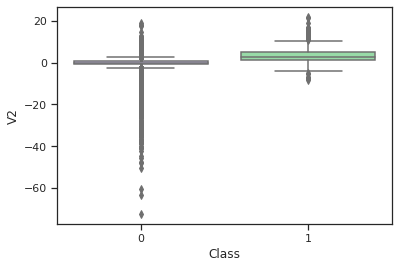

In [ ]:
sns.set_theme(style="ticks", palette="pastel")


# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Class", y="V2", palette=["m", "g"],data=df)

### **V3**

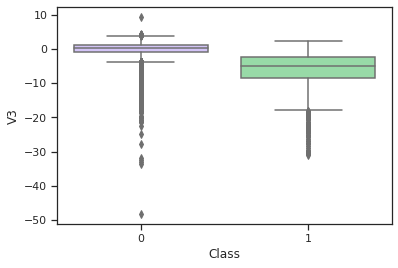

In [ ]:
sns.set_theme(style="ticks", palette="pastel")


# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Class", y="V3", palette=["m", "g"],data=df)

### **V4**

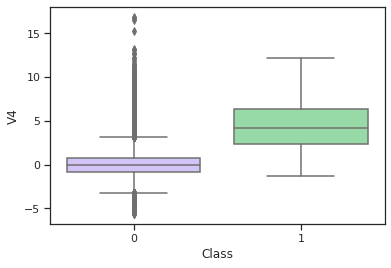

In [ ]:
sns.set_theme(style="ticks", palette="pastel")


# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Class", y="V4", palette=["m", "g"],data=df)

### **V5**

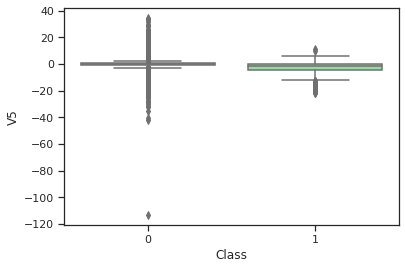

In [ ]:
sns.set_theme(style="ticks", palette="pastel")


# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Class", y="V5", palette=["m", "g"],data=df)

### **V6**

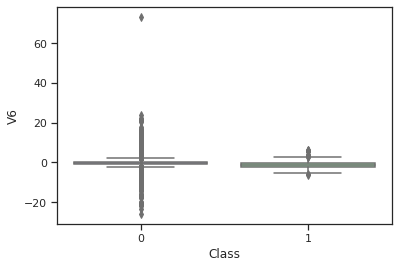

In [ ]:
sns.set_theme(style="ticks", palette="pastel")


# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Class", y="V6", palette=["m", "g"],data=df)

### **V7**

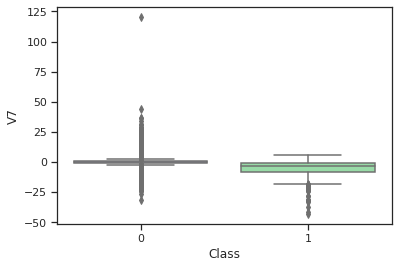

In [ ]:
sns.set_theme(style="ticks", palette="pastel")


# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Class", y="V7", palette=["m", "g"],data=df)

### **V8**

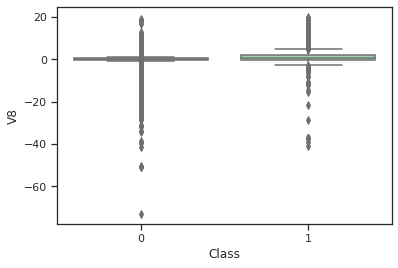

In [ ]:
sns.set_theme(style="ticks", palette="pastel")


# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Class", y="V8", palette=["m", "g"],data=df)

### **V9**

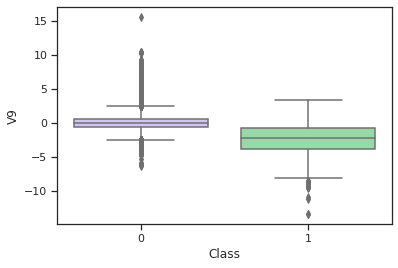

In [ ]:
sns.set_theme(style="ticks", palette="pastel")


# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Class", y="V9", palette=["m", "g"],data=df)

### **V10**

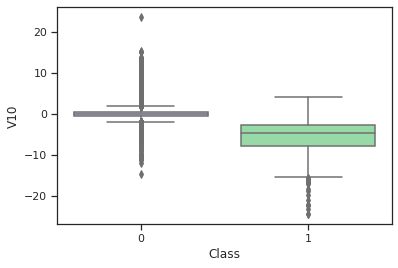

In [ ]:
sns.set_theme(style="ticks", palette="pastel")


# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Class", y="V10", palette=["m", "g"],data=df)

### **V11**

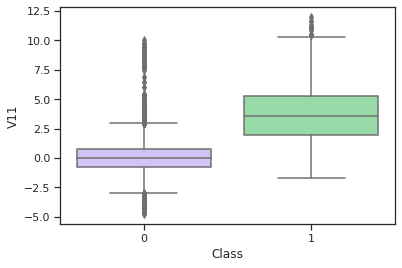

In [ ]:
sns.set_theme(style="ticks", palette="pastel")


# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Class", y="V11", palette=["m", "g"],data=df)

### **V12**

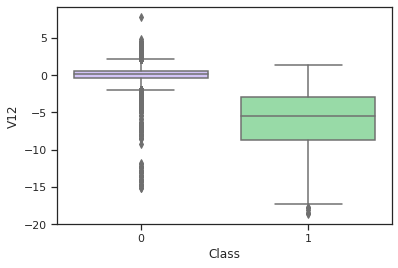

In [ ]:
sns.set_theme(style="ticks", palette="pastel")


# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Class", y="V12", palette=["m", "g"],data=df)

### **V13**

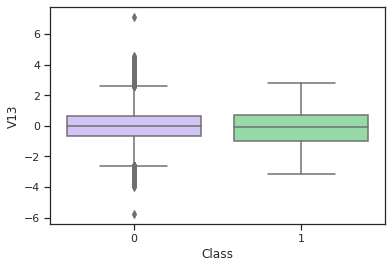

In [ ]:
sns.set_theme(style="ticks", palette="pastel")


# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Class", y="V13", palette=["m", "g"],data=df)

### **V14**

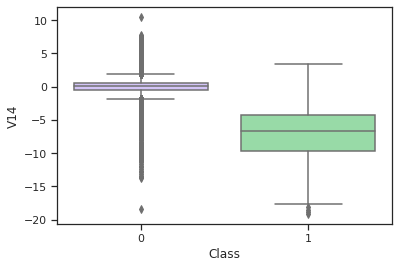

In [ ]:
sns.set_theme(style="ticks", palette="pastel")


# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Class", y="V14", palette=["m", "g"],data=df)

### **V15**

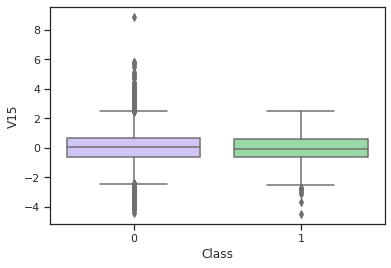

In [ ]:
sns.set_theme(style="ticks", palette="pastel")


# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Class", y="V15", palette=["m", "g"],data=df)

### **V16**

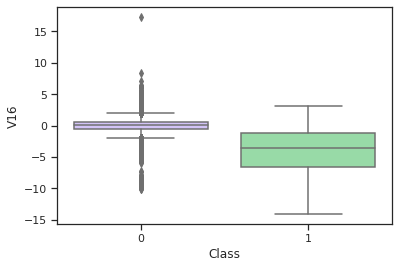

In [ ]:
sns.set_theme(style="ticks", palette="pastel")


# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Class", y="V16", palette=["m", "g"],data=df)

### **V17**

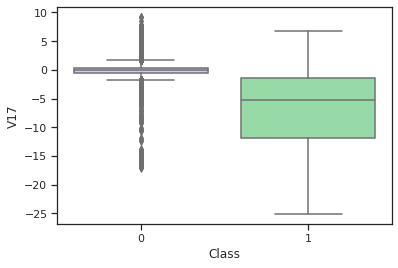

In [ ]:
sns.set_theme(style="ticks", palette="pastel")


# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Class", y="V17", palette=["m", "g"],data=df)

### **V18**

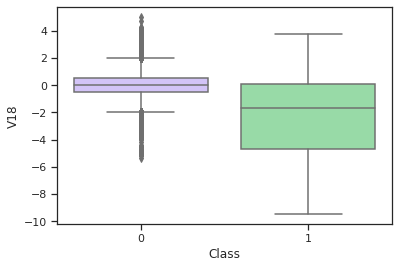

In [ ]:
sns.set_theme(style="ticks", palette="pastel")


# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Class", y="V18", palette=["m", "g"],data=df)

### **V19**

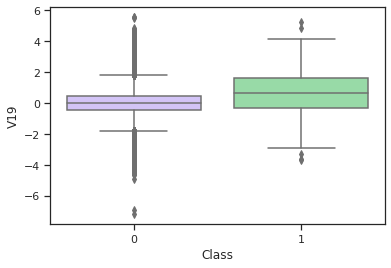

In [ ]:
sns.set_theme(style="ticks", palette="pastel")


# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Class", y="V19", palette=["m", "g"],data=df)

### **V20**

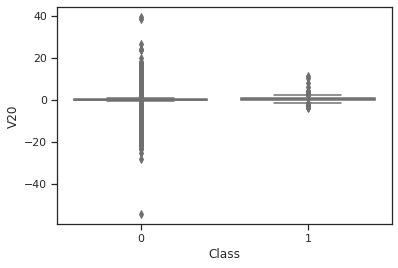

In [ ]:
sns.set_theme(style="ticks", palette="pastel")


# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Class", y="V20", palette=["m", "g"],data=df)

### **V21**

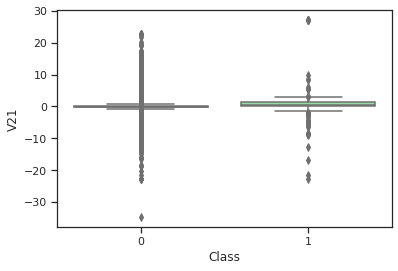

In [ ]:
sns.set_theme(style="ticks", palette="pastel")


# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Class", y="V21", palette=["m", "g"],data=df)

### **V22**

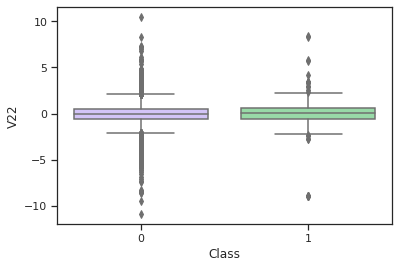

In [ ]:
sns.set_theme(style="ticks", palette="pastel")


# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Class", y="V22", palette=["m", "g"],data=df)

### **V23**

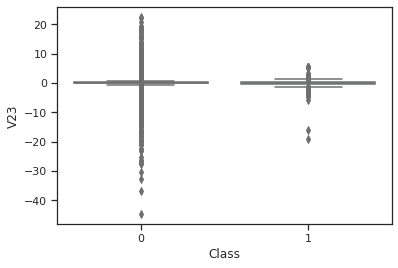

In [ ]:
sns.set_theme(style="ticks", palette="pastel")


# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Class", y="V23", palette=["m", "g"],data=df)

### **V24**

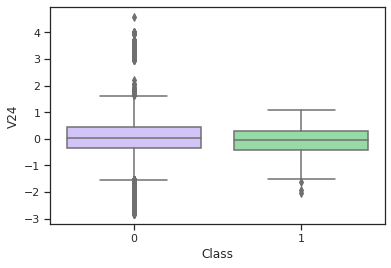

In [ ]:
sns.set_theme(style="ticks", palette="pastel")


# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Class", y="V24", palette=["m", "g"],data=df)

### **V25**

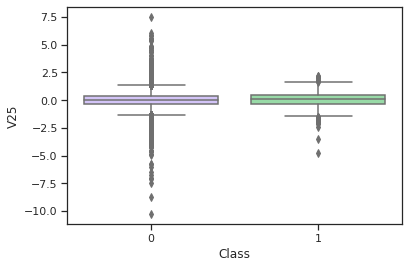

In [ ]:
sns.set_theme(style="ticks", palette="pastel")


# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Class", y="V25", palette=["m", "g"],data=df)

### **V26**

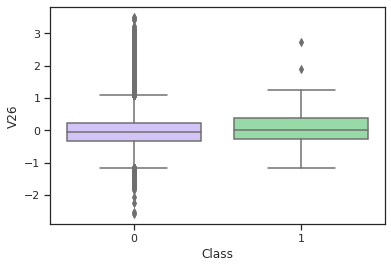

In [ ]:
sns.set_theme(style="ticks", palette="pastel")


# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Class", y="V26", palette=["m", "g"],data=df)

### **V27**

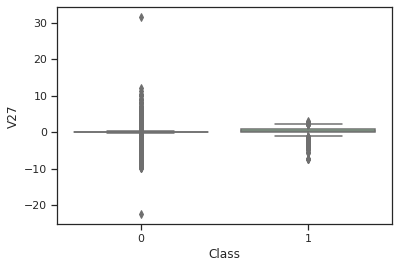

In [ ]:
sns.set_theme(style="ticks", palette="pastel")


# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Class", y="V27", palette=["m", "g"],data=df)

### **V28**

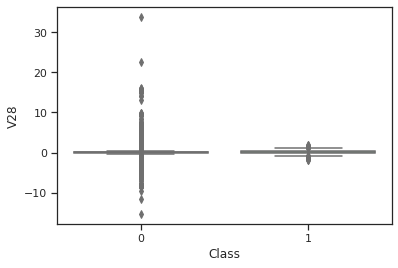

In [ ]:
sns.set_theme(style="ticks", palette="pastel")


# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Class", y="V28", palette=["m", "g"],data=df)

## **Model Training**

### **Model Evaluation**

**Na Feature Importance os scores foram**

In [ ]:
resultados = [{'AUC': 0.796648706945299,
  'F-1': 0.7832117499756334,
  'accuracy': 0.7965995582380169,
  'b-accuracy': 0.796648706945299,
  'name': 'Catboost',
  'precision': 0.8391491549386286,
  'recall': 0.7342658325718704},
   {'AUC': 0.9989726849058795,
  'F-1': 0.9989741571928443,
  'accuracy': 0.9989729737334515,
  'b-accuracy': 0.9989726849058796,
  'name': 'Gradient Boosting',
  'precision': 0.9986092966412407,
  'recall': 0.999339284459127},           
{'AUC': 0.9745094475630635,
  'F-1': 0.9739754539582287,
  'accuracy': 0.9744931695718848,
  'b-accuracy': 0.9745094475630635,
  'name': 'Random Forest',
  'precision': 0.9949703057408901,
  'recall': 0.9538483165811485},
  {'AUC': 0.9995776681274127,
  'F-1': 0.9995784089152462,
  'accuracy': 0.9995779344110075,
  'b-accuracy': 0.9995776681274127,
  'name': 'LGBM',
  'precision': 0.9992413919053706,
  'recall': 0.9999156533352077},
{'AUC': 0.9982406163912337,
  'F-1': 0.998244505301594,
  'accuracy': 0.9982413933791978,
  'b-accuracy': 0.9982406163912337,
  'name': 'Decision Tree',
  'precision': 0.9972641178533848,
  'recall': 0.999226822239404},
{'AUC': 0.9864979163456465,
  'F-1': 0.9864353134007801,
  'accuracy': 0.986493901152239,
  'b-accuracy': 0.9864979163456465,
  'name': 'AdaBoosting',
  'precision': 0.9915209703304976,
  'recall': 0.9814015604132986},
{'AUC': 0.9998662405136365,
  'F-1': 0.9998664689470023,
  'accuracy': 0.999866345896819,
  'b-accuracy': 0.9998662405136365,
  'name': 'XGBoosting',
  'precision': 0.9997329735503274,
  'recall': 1.0}
]

In [ ]:
results = pd.DataFrame(resultados)

In [ ]:
resultados.head(10)

,name,accuracy,b-accuracy,F-1,AUC,precision,recall
0,Catboost,0.796600,0.796649,0.783212,0.796649,0.839149,0.734266
1,Gradient Boosting,0.998973,0.998973,0.998974,0.998973,0.998609,0.999339
2,Random Forest,0.974493,0.974509,0.973975,0.974509,0.994970,0.953848
3,LGBM,0.999578,0.999578,0.999578,0.999578,0.999241,0.999916
4,Decision Tree,0.998241,0.998241,0.998245,0.998241,0.997264,0.999227
5,AdaBoosting,0.986494,0.986498,0.986435,0.986498,0.991521,0.981402
6,XGBoosting,0.999866,0.999866,0.999866,0.999866,0.999733,1.000000


In [ ]:
resultados =results[['name','accuracy','b-accuracy','F-1','AUC','precision','recall']]

### **Testing Undersampling Method**

In [ ]:
def balancear(data):
    X = data.drop('Class', axis=1)
    y = data['Class']
    undersample = RandomUnderSampler(random_state=42)
    X, y = undersample.fit_resample(X, y)
    return train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = balancear(df)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
import xgboost as xgb
 
def train_in_models(X_train, X_test, y_train, y_test):
 
  models = [
    {"name": "KNN", "model": KNeighborsClassifier(n_neighbors=2)},
    {"name": "Decision Tree", "model": DecisionTreeClassifier(random_state=42)},
    {"name": "Random Forest", "model": RandomForestClassifier(max_depth=10, random_state=42)},
    {"name": "SVM", "model": SVC(gamma='auto',kernel='rbf')},
    {"name": "MLP", "model": MLPClassifier( alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=42)},
    {"name": "Adaboost", "model": AdaBoostClassifier(n_estimators=100, random_state=42)},
    {"name": "XGboost", "model": xgb.XGBClassifier(n_estimators=500, max_depth=5, eta=0.05,random_state=42)},
    {"name": "LGBM", "model": lightgbm.LGBMClassifier(random_state=42)},
    {"name": "GradientBoosting", "model": GradientBoostingClassifier(learning_rate=0.05, max_depth=5, n_estimators=500, min_samples_split=5, n_iter_no_change=10)}
  ]
 
 
  result = []
  for item in models:
    model = item['model']
    classifier = model.fit(X_train,y_train)
    predictions = classifier.predict(X_test)
    acc = metrics.accuracy_score(y_test, predictions) 
    bacc = metrics.balanced_accuracy_score(y_test, predictions)
    prec = metrics.precision_score(y_test, predictions)
    rec = metrics.recall_score(y_test, predictions)
    f1 = metrics.f1_score(y_test, predictions) 
    auc = metrics.roc_auc_score(y_test, predictions)
    specificity = specificity_score(y_test, predictions, average='binary')
    result.append({ 'name': item['name'], 'accuracy': acc , 'b-accuracy':bacc, 'precision':prec,'recall':rec, 'F-1':f1, 'AUC':auc,'spec':specificity})
  
  return pd.DataFrame(result)

<AxesSubplot:title={'center':'Models with more accuracy'}, ylabel='name'>

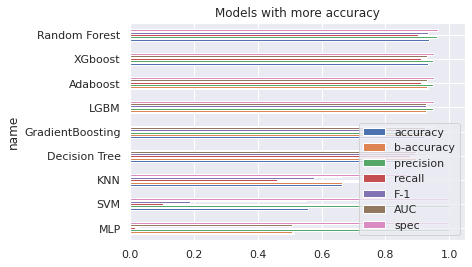

In [ ]:
result_quality = train_in_models(X_train, X_test, y_train, y_test)
result_quality.sort_values(by='accuracy',ascending=True).plot(kind='barh', x='name', title="Models with more accuracy")

In [ ]:
result_quality.head(10)

,name,accuracy,b-accuracy,precision,recall,F-1,AUC,spec
0,KNN,0.665541,0.662785,0.770115,0.458904,0.575107,0.662785,0.866667
1,Decision Tree,0.895270,0.895023,0.907801,0.876712,0.891986,0.895023,0.913333
2,Random Forest,0.935811,0.935388,0.963504,0.904110,0.932862,0.935388,0.966667
3,SVM,0.557432,0.551370,1.000000,0.102740,0.186335,0.551370,1.000000
4,MLP,0.513514,0.506849,1.000000,0.013699,0.027027,0.506849,1.000000
5,Adaboost,0.932432,0.932146,0.950000,0.910959,0.930070,0.932146,0.953333
6,XGboost,0.932432,0.932146,0.950000,0.910959,0.930070,0.932146,0.953333
7,LGBM,0.929054,0.928721,0.949640,0.904110,0.926316,0.928721,0.953333
8,GradientBoosting,0.925676,0.925205,0.955882,0.890411,0.921986,0.925205,0.960000


### **Testing Hybrid Method Oversampling and Undersampling**

**Teste 1**

In [ ]:
def underover(data):
  # Dividir o Dataset em Dados e Labels. Oversampling com SMOTE e train test split.
    X = data.drop('Class', axis=1)
    y = data['Class']
    undersample = RandomUnderSampler(random_state=42,sampling_strategy=0.6)
    oversample = SMOTE(random_state=42)
    X, y = undersample.fit_resample(X, y)
    X, y = oversample.fit_resample(X, y)
    return train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = underover(df)

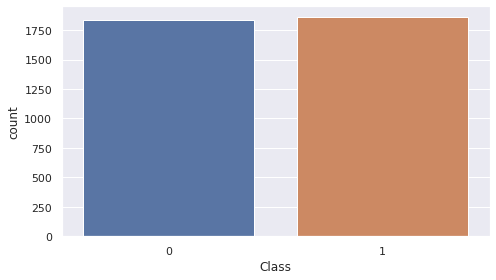

In [ ]:
fig, ax = plt.subplots(figsize=(7, 4))
ax = sns.countplot(y_train)
plt.tight_layout()

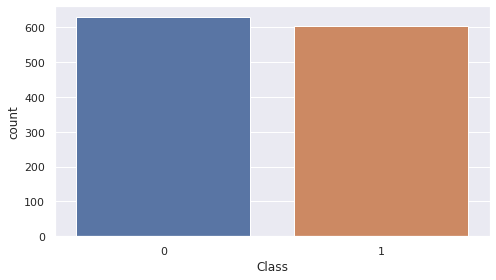

In [ ]:
fig, ax = plt.subplots(figsize=(7, 4))
ax = sns.countplot(y_test)
plt.tight_layout()

In [ ]:
y_test.value_counts()

0    628
1    602
Name: Class, dtype: int64

In [ ]:
y_train.value_counts()

1    1858
0    1832
Name: Class, dtype: int64

In [ ]:
def train_in_models(X_train, X_test, y_train, y_test):
 
  models = [
    {"name": "Random Forest", "model": RandomForestClassifier(max_depth=10, random_state=42)},
    {"name": "Adaboost", "model": AdaBoostClassifier(n_estimators=100, random_state=42)},
    {"name": "XGboost", "model": xgb.XGBClassifier(n_estimators=500, max_depth=5, eta=0.05,random_state=42)},
    {"name": "LGBM", "model": lightgbm.LGBMClassifier(random_state=42)},
    {"name": "GradientBoosting", "model": GradientBoostingClassifier(learning_rate=0.05, max_depth=5, n_estimators=500, min_samples_split=5, n_iter_no_change=10)}
  ]
 
 
  result = []
  for item in models:
    model = item['model']
    classifier = model.fit(X_train,y_train)
    predictions = classifier.predict(X_test)
    acc = metrics.accuracy_score(y_test, predictions) 
    bacc = metrics.balanced_accuracy_score(y_test, predictions)
    prec = metrics.precision_score(y_test, predictions)
    rec = metrics.recall_score(y_test, predictions)
    f1 = metrics.f1_score(y_test, predictions) 
    auc = metrics.roc_auc_score(y_test, predictions)
    specificity = specificity_score(y_test, predictions, average='binary')
    result.append({ 'name': item['name'], 'accuracy': acc , 'b-accuracy':bacc, 'precision':prec,'recall':rec, 'F-1':f1, 'AUC':auc,'spec':specificity})
  
  return pd.DataFrame(result)

<AxesSubplot:title={'center':'Models with more accuracy'}, ylabel='name'>

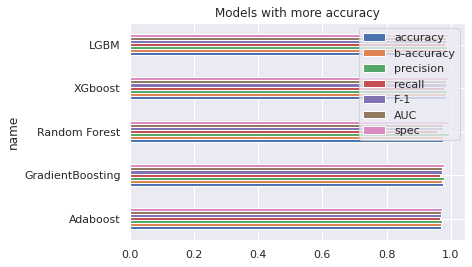

In [ ]:
result_quality = train_in_models(X_train, X_test, y_train, y_test)
result_quality.sort_values(by='accuracy',ascending=True).plot(kind='barh', x='name', title="Models with more accuracy")

In [ ]:
result_quality.head(10)

,name,accuracy,b-accuracy,precision,recall,F-1,AUC,spec
0,Random Forest,0.977236,0.976847,0.994828,0.958472,0.976311,0.976847,0.995223
1,Adaboost,0.971545,0.971480,0.973289,0.968439,0.970858,0.971480,0.974522
2,XGboost,0.984553,0.984426,0.989916,0.978405,0.984127,0.984426,0.990446
3,LGBM,0.986179,0.986087,0.989950,0.981728,0.985822,0.986087,0.990446
4,GradientBoosting,0.974797,0.974665,0.979832,0.968439,0.974102,0.974665,0.980892


**Teste 2**

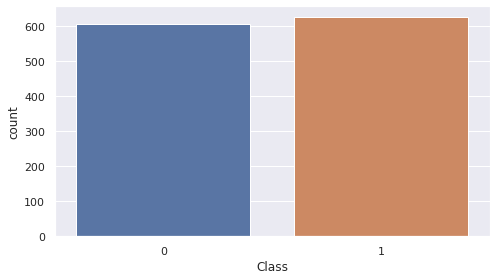

In [ ]:
fig, ax = plt.subplots(figsize=(7, 4))
ax = sns.countplot(y_train)
plt.tight_layout()

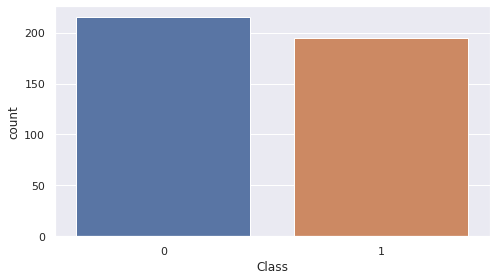

In [ ]:
fig, ax = plt.subplots(figsize=(7, 4))
ax = sns.countplot(y_test)
plt.tight_layout()

In [ ]:
y_train.value_counts()

1    625
0    605
Name: Class, dtype: int64

In [ ]:
y_test.value_counts()

0    215
1    195
Name: Class, dtype: int64

<AxesSubplot:title={'center':'Models with more accuracy'}, ylabel='name'>

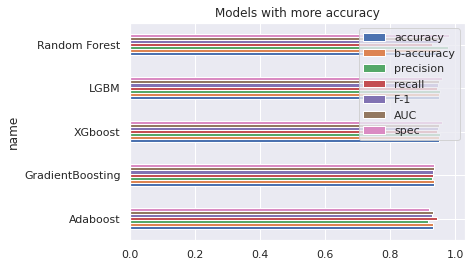

In [ ]:
result_quality = train_in_models(X_train, X_test, y_train, y_test)
result_quality.sort_values(by='accuracy',ascending=True).plot(kind='barh', x='name', title="Models with more accuracy")

In [ ]:
result_quality.head(10)

,name,accuracy,b-accuracy,precision,recall,F-1,AUC,spec
0,Random Forest,0.956098,0.954800,0.978378,0.928205,0.952632,0.954800,0.981395
1,Adaboost,0.931707,0.932260,0.915423,0.943590,0.929293,0.932260,0.920930
2,XGboost,0.951220,0.950865,0.953368,0.943590,0.948454,0.950865,0.958140
3,LGBM,0.951220,0.950865,0.953368,0.943590,0.948454,0.950865,0.958140
4,GradientBoosting,0.934146,0.934109,0.928571,0.933333,0.930946,0.934109,0.934884


## **Tuning of Hyperparameters**

In [ ]:
#definindo hiperparâmetros
hiperparam = {'criterion':('gini','entropy'), 'max_depth':range(1,50),'random_state':[42],'max_features':('auto','sqrt','log2')}

#definindo o tipo de validacao cruzada e o numero de folds
cv_strat = StratifiedKFold(n_splits = 10)

#instânciando meu classificador
classifier = RandomForestClassifier()

#definindo a estrategia de score a partir da metrica f1
f1 = make_scorer(f1_score)

#instanciando e modelando o grid search com os hiperparametros e a validação definidas.
grid_cv = GridSearchCV(classifier, hiperparam, cv = cv_strat, scoring = f1)
grid_cv.fit(X_train, y_train)

In [ ]:
#vamos olhar para todos os resultados encontrados!
print('Resumo de todos os resultados encontrados:\n\n', grid_cv.cv_results_)


Resumo de todos os resultados encontrados:

 {'mean_fit_time': array([0.3348021 , 0.47922432, 0.18442509, 0.23078704, 0.22796197,
       0.21467583, 0.26571541, 0.27060146, 0.24518106, 0.2921423 ,
       0.28915787, 0.2637871 , 0.31982617, 0.33558049, 0.28290858,
       0.33475721, 0.34538136, 0.30364428, 0.35990191, 0.35963626,
       0.3166173 , 0.37551739, 0.37512865, 0.33102467, 0.38389671,
       0.38374171, 0.33958797, 0.39071863, 0.38915567, 0.35188742,
       0.39828577, 0.40139482, 0.35112703, 0.40079694, 0.4022789 ,
       0.36186914, 0.4068243 , 0.41544585, 0.35899215, 0.41915207,
       0.41352718, 0.36093321, 0.40592339, 0.40770974, 0.37112579,
       0.40928209, 0.41403685, 0.38204105, 0.41956742, 0.41731834,
       0.36009591, 0.40556371, 0.40954754, 0.36097071, 0.41195967,
       0.41954935, 0.36216366, 0.40570276, 0.41107659, 0.3660738 ,
       0.40623772, 0.40301528, 0.36496851, 0.40709388, 0.41945243,
       0.36502712, 0.41151857, 0.40412352, 0.35733306, 0.40799122,

In [ ]:
#vamos olhar para os melhores resultados encontrados pelo Grid Search
print('Melhor resultado f1:', grid_cv.best_score_)
print('\n\nMelhor configuração de hiperparâmetros:', grid_cv.best_params_)

print( '\n\nConfigurações de todos os hiperparâmetros do melhor estimado encontrado pelo GridSearch: \n', grid_cv.best_estimator_)

Melhor resultado f1: 0.9619410496415457


Melhor configuração de hiperparâmetros: {'criterion': 'entropy', 'max_depth': 17, 'max_features': 'log2', 'random_state': 42}


Configurações de todos os hiperparâmetros do melhor estimado encontrado pelo GridSearch: 
 RandomForestClassifier(criterion='entropy', max_depth=17, max_features='log2',
                       random_state=42)


In [ ]:
#definindo hiperparâmetros
hiperparam = {'booster':('gbtree','gblinear','dart'), 'max_depth':range(40,50),'random_state':[42],'n_estimators':[400,450,500]}

#definindo o tipo de validacao cruzada e o numero de folds
cv_strat = StratifiedKFold(n_splits = 10)

#instânciando meu classificador
classifier = XGBClassifier()

#definindo a estrategia de score a partir da metrica f1
f1 = make_scorer(f1_score)

#instanciando e modelando o grid search com os hiperparametros e a validação definidas.
grid_cv = GridSearchCV(classifier, hiperparam, cv = cv_strat, scoring = f1)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=XGBClassifier(),
             param_grid={'booster': ('gbtree', 'gblinear', 'dart'),
                         'max_depth': range(40, 50),
                         'n_estimators': [400, 450, 500],
                         'random_state': [42]},
             scoring=make_scorer(f1_score))

In [ ]:
#vamos olhar para todos os resultados encontrados!
print('Resumo de todos os resultados encontrados:\n\n', grid_cv.cv_results_)

Resumo de todos os resultados encontrados:

 {'mean_fit_time': array([1.94399171, 0.85446019, 0.90378976, 0.79415367, 0.84603472,
       0.89766512, 0.78816857, 0.83434775, 0.89401672, 0.79296465,
       0.84385347, 0.8918848 , 0.79652178, 0.83975754, 0.88583918,
       0.7900089 , 0.84141233, 0.8950721 , 0.7897172 , 0.84489849,
       0.90855689, 0.7963357 , 0.85156507, 0.89725831, 0.79472458,
       0.84313309, 0.90156763, 0.79492621, 0.8551506 , 0.8768038 ,
       0.21093948, 0.23854434, 0.26230991, 0.21262505, 0.23604383,
       0.26443894, 0.21207659, 0.23955126, 0.26493185, 0.21070948,
       0.23528571, 0.26525271, 0.2117806 , 0.23521087, 0.26003652,
       0.21185274, 0.23521893, 0.26231496, 0.20982485, 0.23967419,
       0.26410906, 0.21024098, 0.23684816, 0.26388667, 0.21324668,
       0.23547897, 0.26294851, 0.21127527, 0.23686473, 0.26457236,
       3.95265021, 4.9560617 , 5.91582866, 3.96488149, 4.77157736,
       5.63129885, 3.87209344, 4.69712756, 5.60843225, 3.9181998 ,

In [ ]:
#vamos olhar para os melhores resultados encontrados pelo Grid Search
print('Melhor resultado f1:', grid_cv.best_score_)
print('\n\nMelhor configuração de hiperparâmetros:', grid_cv.best_params_)

print( '\n\nConfigurações de todos os hiperparâmetros do melhor estimado encontrado pelo GridSearch: \n', grid_cv.best_estimator_)

Melhor resultado f1: 0.9544951330289637


Melhor configuração de hiperparâmetros: {'booster': 'gbtree', 'max_depth': 40, 'n_estimators': 500, 'random_state': 42}


Configurações de todos os hiperparâmetros do melhor estimado encontrado pelo GridSearch: 
 XGBClassifier(max_depth=40, n_estimators=500, random_state=42)


In [ ]:
from sklearn import metrics   
def train_in_models(X_train, X_test, y_train, y_test):
 
  models = [
    {"name": "Random Forest", "model": RandomForestClassifier(criterion='entropy', max_depth= 17, max_features= 'log2', random_state= 42)},
    {"name": "XGboost", "model": XGBClassifier(n_estimators=500,booster='gbtree', max_depth=40, eta=0.05,random_state=42)}
  ]
 
 
  result = []
  for item in models:
    model = item['model']
    classifier = model.fit(X_train,y_train)
    predictions = classifier.predict(X_test)
    acc = metrics.accuracy_score(y_test, predictions) 
    bacc = metrics.balanced_accuracy_score(y_test, predictions)
    prec = metrics.precision_score(y_test, predictions)
    rec = metrics.recall_score(y_test, predictions)
    f1 = metrics.f1_score(y_test, predictions) 
    auc = metrics.roc_auc_score(y_test, predictions)
    specificity = specificity_score(y_test, predictions, average='binary')
    confusion=metrics.confusion_matrix(y_test, predictions)
    result.append({ 'name': item['name'], 'accuracy': acc , 'b-accuracy':bacc, 'precision':prec,'recall':rec, 'F-1':f1, 'AUC':auc,'spec':specificity,'confusion':confusion})
    
  return pd.DataFrame(result)

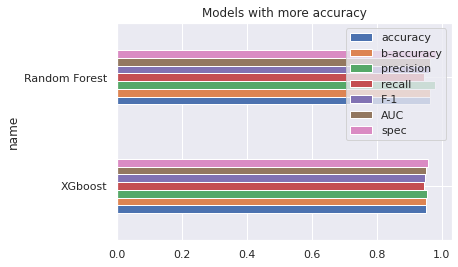

In [ ]:
result_quality = train_in_models(X_train, X_test, y_train, y_test)
result_quality.sort_values(by='accuracy',ascending=True).plot(kind='barh', x='name', title="Models with more accuracy")

In [ ]:
result_quality.head()

,name,accuracy,b-accuracy,precision,recall,F-1,AUC,spec,confusion
0,Random Forest,0.963415,0.962493,0.978723,0.94359,0.960836,0.962493,0.981395,"[[211, 4], [11, 184]]"
1,XGboost,0.951220,0.950865,0.953368,0.94359,0.948454,0.950865,0.958140,"[[206, 9], [11, 184]]"


In [ ]:
model= RandomForestClassifier(criterion='entropy', max_depth= 17, max_features= 'log2', random_state= 42)
classifier = model.fit(X_train,y_train)
predictions = classifier.predict(X_test)
confusion=metrics.confusion_matrix(y_test, predictions)
print("Matriz de Confusão\n",confusion)

Matriz de Confusão
 [[211   4]
 [ 11 184]]
